<a href="https://colab.research.google.com/github/ShahedSabab/Price-Forecasting/blob/master/Price_Forecasting_Using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [261]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet
from statsmodels.tsa.stattools import adfuller

# Read Data


In [262]:
# read data
df = pd.read_csv('avocado.csv')

In [263]:
# check the first 5 sample
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [264]:
# check data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [265]:
# check data statistics
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [266]:
# check null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Divide the data into train-test

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


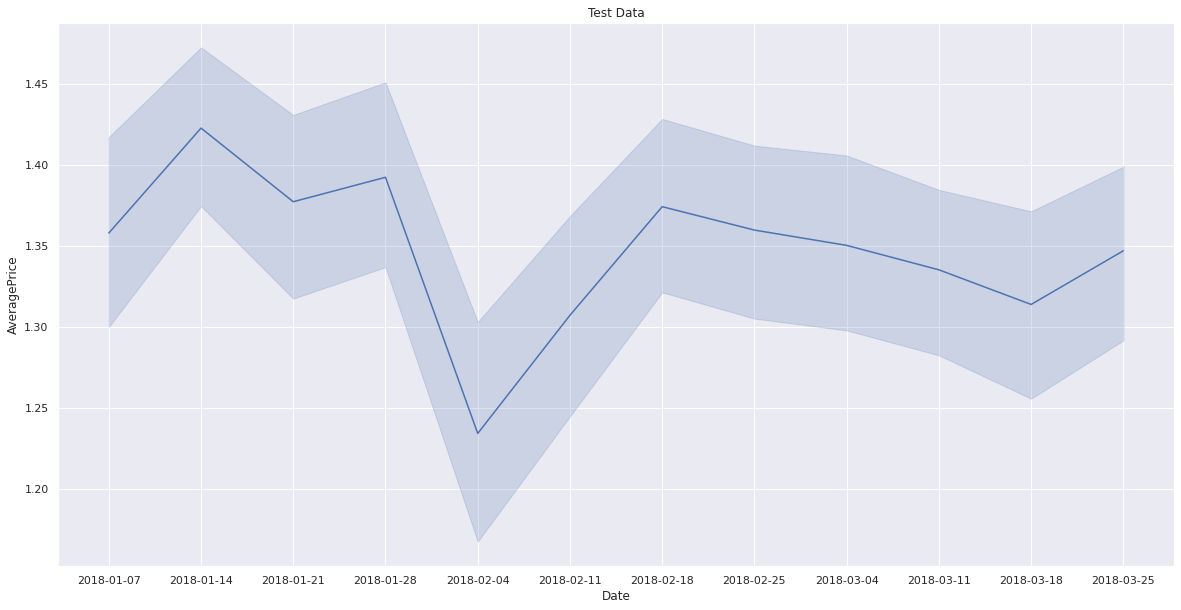

In [318]:
df = df.sort_values('Date')
df_test = df.iloc[-1296:]
df_train = df.iloc[:-1296]
# Plot date and average price
plt.figure(figsize = (20,10))
plt.title('Test Data')
sns.lineplot('Date', 'AveragePrice', data=df_test)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


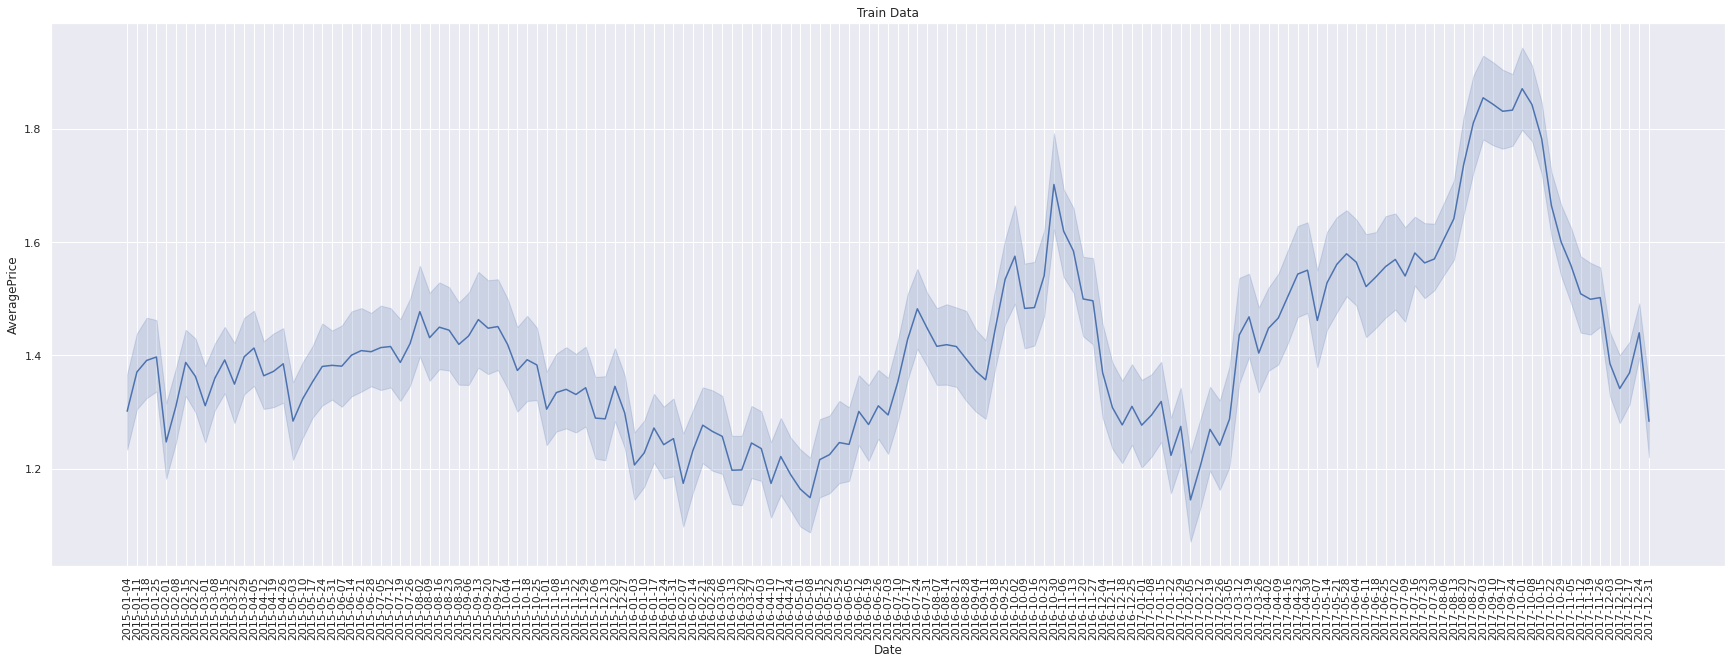

In [319]:
# Plot date and average price
plt.figure(figsize = (30,10))
plt.title('Train Data')
plt.xticks(rotation=90)
sns.lineplot('Date', 'AveragePrice', data=df_train)

The training data consists of data from 2015-2017. We will try to predict average price of avocado in 2018.

# Exploratory Data Analysis

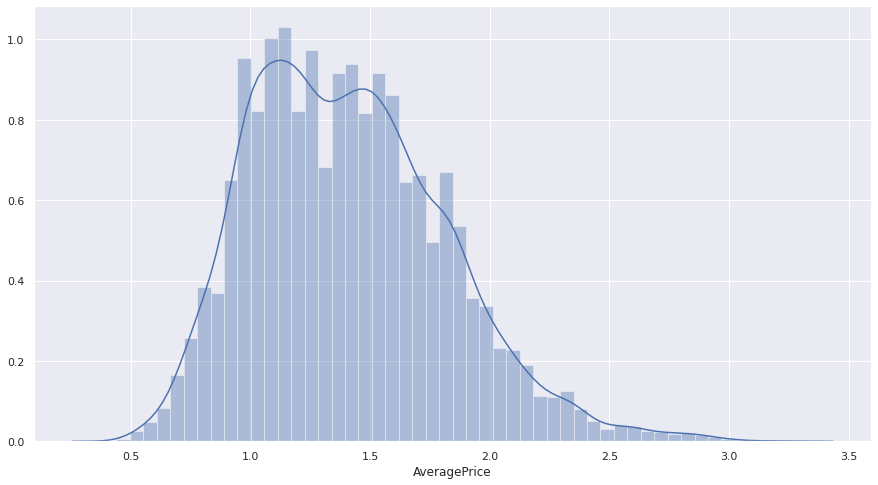

In [269]:
# Plot distribution of the average price
plt.figure(figsize=(15,8))
sns.distplot(df_train['AveragePrice'])

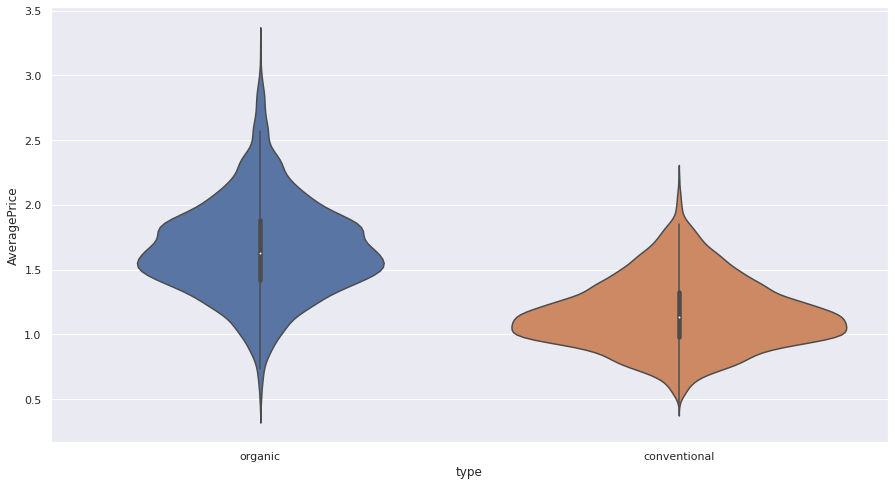

In [270]:
# Plot a violin plot of the average price vs. avocado type
plt.figure(figsize=(15,8))
sns.violinplot(y = 'AveragePrice', x ='type', data = df_train)

Organic avocado price is greater than the conventional one.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

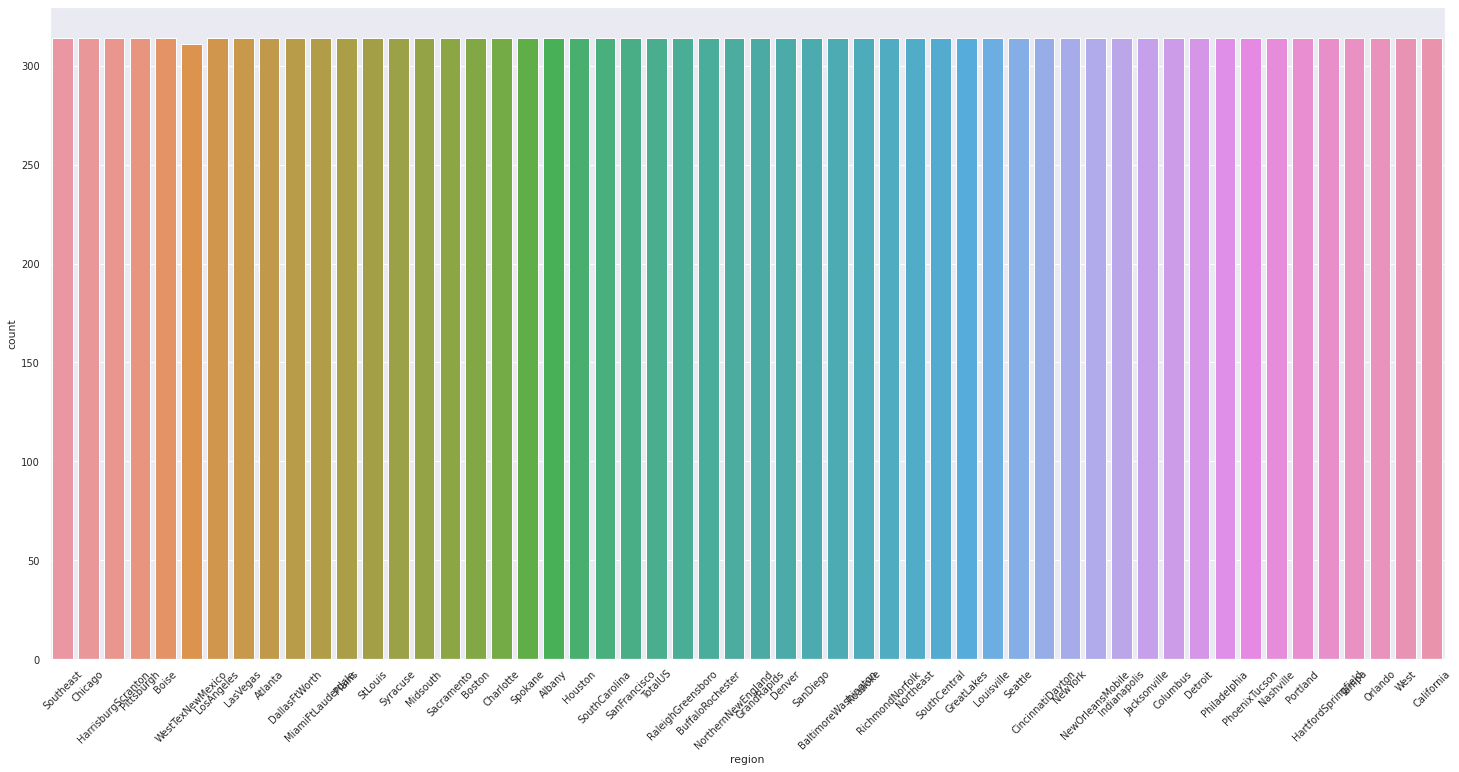

In [271]:
# Bar Chart to indicate the number of regions 
sns.set(font_scale=0.9) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = df_train)
plt.xticks(rotation = 45)


Almost all the regions have equal numebr of samples.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

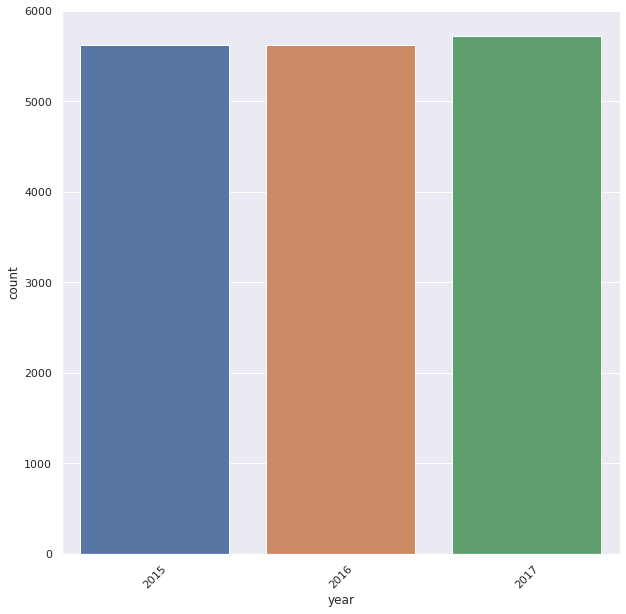

In [272]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1) 
plt.figure(figsize=[10,10])
sns.countplot(x = 'year', data = df_train)
plt.xticks(rotation = 45)

All the years have almost equal number of samples. 

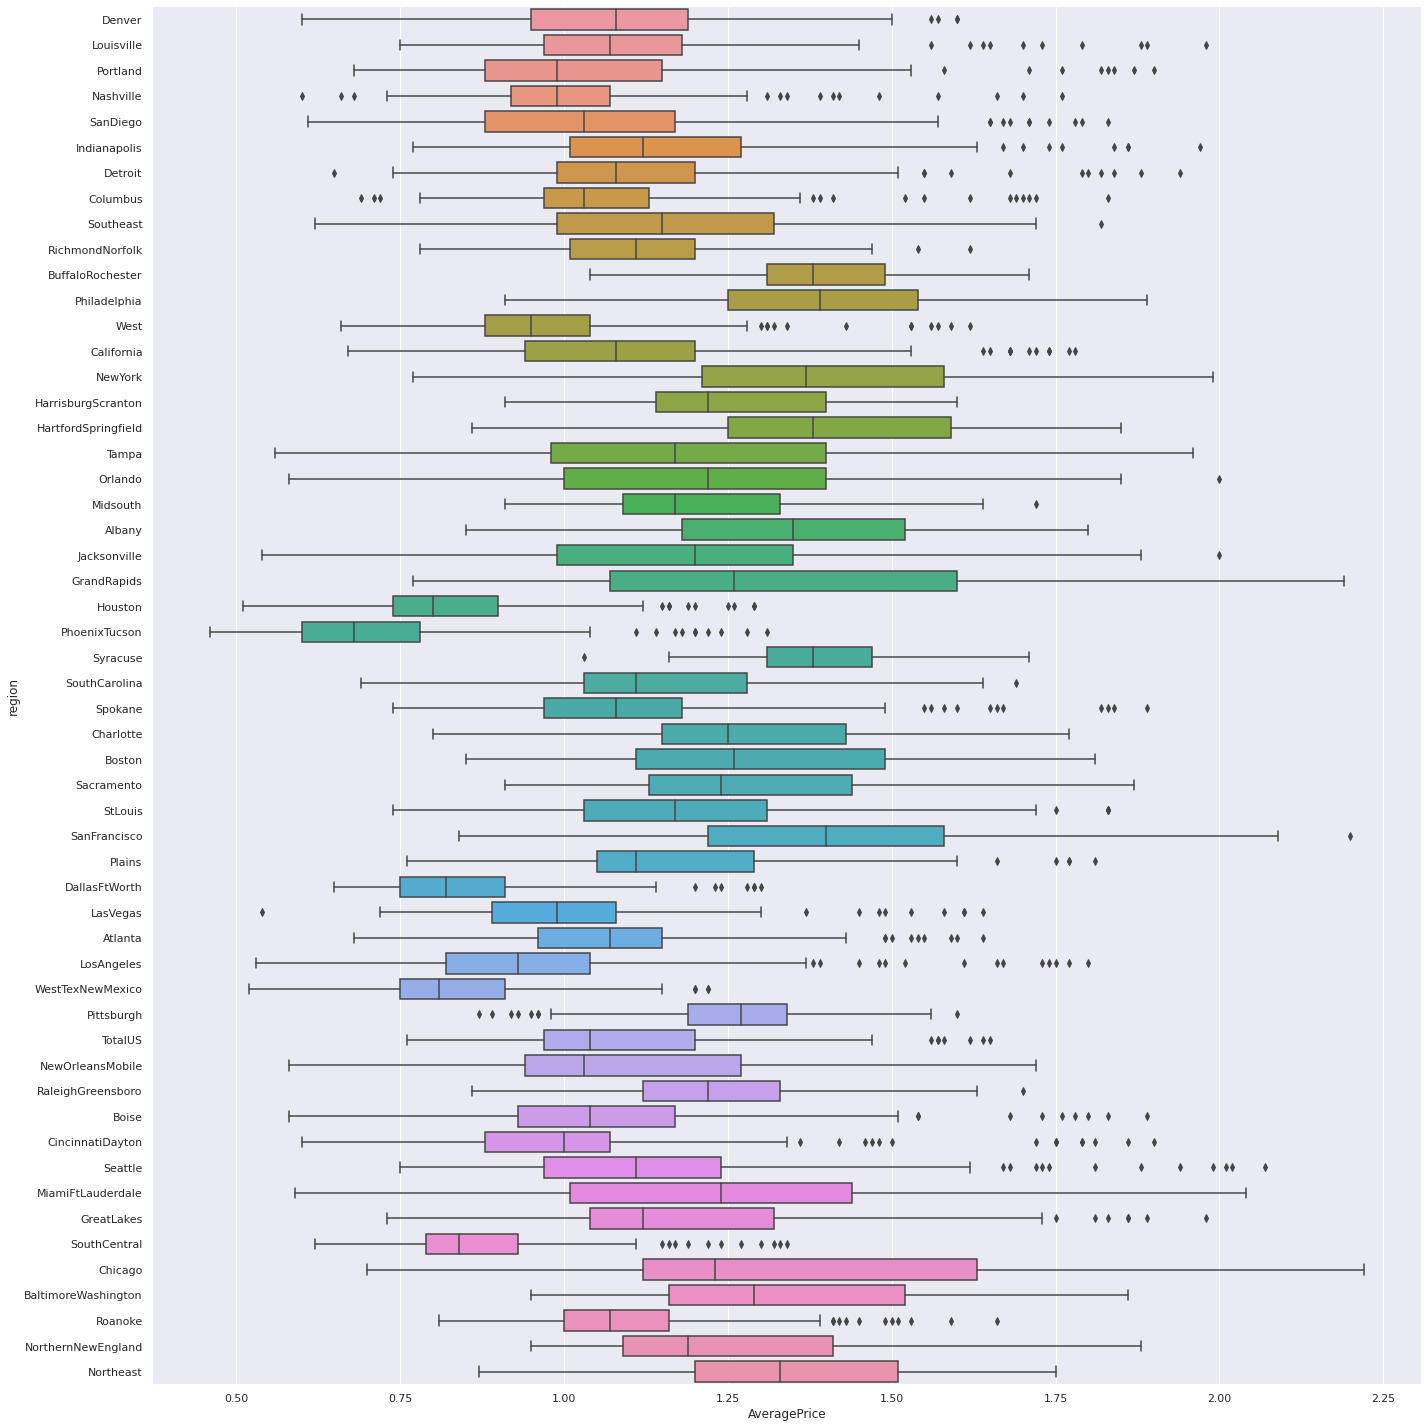

In [321]:
# plot the avocado prices vs. regions for conventional avocados
sns.catplot('AveragePrice', 'region', data = df_train[df_train['type']=='conventional'], height=20, kind="box")

In case of conventional Avocado SanFrancisco, Philadelphia, Syracuse, and BuffaloRochester regions showed higher average price. The large variation of price seemed in the GrandRapids, Chicago, and MiamiFtLauderdale regions. 

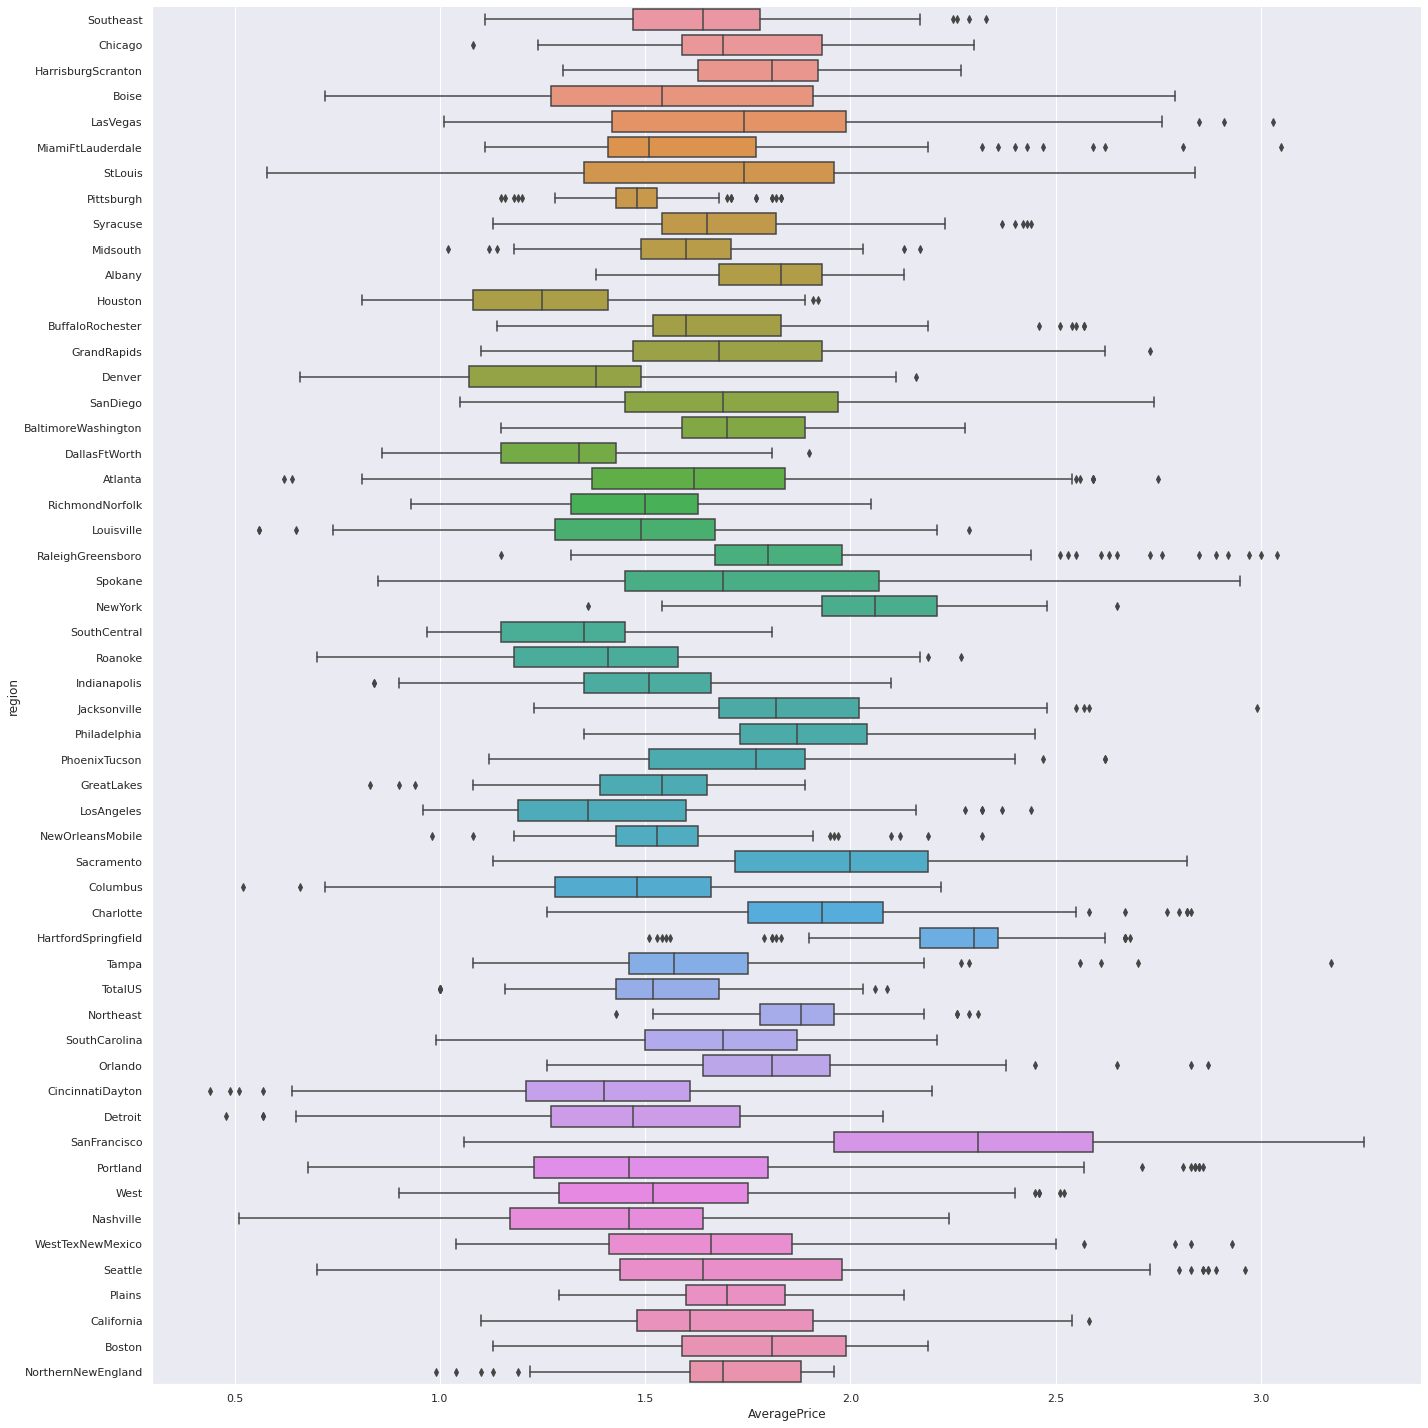

In [316]:
# plot the avocado prices vs. regions for organic avocados
sns.catplot('AveragePrice', 'region', data = df_train[df_train['type']=='organic'],height=20, kind="box")

In case of organic Avocado, HartfordSpringfield and SanFrancisco regions showed higher average price whereas the largest variation of price seemed in the Spokane, SanFrancisco, Portland, and Boise regions.

# Applying Prophet

In [278]:
# Take only date and average price for forecasting and rename the fields to match Prophet
pdf = df_train[['Date', 'AveragePrice']]
pdf = pdf.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})
pdf

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
15006,2017-12-31,1.15
14953,2017-12-31,1.86
14900,2017-12-31,1.72
6411,2017-12-31,0.92


In [279]:
# Initialize model object
model = Prophet()
model.fit(pdf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [280]:
# Forcasting price for a year period
future = model.make_future_dataframe(periods = 90, freq='D')
forecast = model.predict(future)

In [281]:
forecast 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.547965,0.890674,1.907158,1.547965,1.547965,-0.141183,-0.141183,-0.141183,-0.141183,-0.141183,-0.141183,0.0,0.0,0.0,1.406782
1,2015-01-04,1.547965,0.932495,1.914216,1.547965,1.547965,-0.141183,-0.141183,-0.141183,-0.141183,-0.141183,-0.141183,0.0,0.0,0.0,1.406782
2,2015-01-04,1.547965,0.926387,1.884502,1.547965,1.547965,-0.141183,-0.141183,-0.141183,-0.141183,-0.141183,-0.141183,0.0,0.0,0.0,1.406782
3,2015-01-04,1.547965,0.903532,1.870779,1.547965,1.547965,-0.141183,-0.141183,-0.141183,-0.141183,-0.141183,-0.141183,0.0,0.0,0.0,1.406782
4,2015-01-04,1.547965,0.932287,1.860897,1.547965,1.547965,-0.141183,-0.141183,-0.141183,-0.141183,-0.141183,-0.141183,0.0,0.0,0.0,1.406782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17038,2018-03-27,1.438439,0.837986,1.829084,1.407506,1.470231,-0.092904,-0.092904,-0.092904,-0.092904,-0.092904,-0.092904,0.0,0.0,0.0,1.345534
17039,2018-03-28,1.437961,0.867151,1.816500,1.406232,1.470646,-0.090611,-0.090611,-0.090611,-0.090611,-0.090611,-0.090611,0.0,0.0,0.0,1.347351
17040,2018-03-29,1.437484,0.845102,1.783356,1.404943,1.470969,-0.088247,-0.088247,-0.088247,-0.088247,-0.088247,-0.088247,0.0,0.0,0.0,1.349237
17041,2018-03-30,1.437007,0.893569,1.856769,1.403646,1.471054,-0.085845,-0.085845,-0.085845,-0.085845,-0.085845,-0.085845,0.0,0.0,0.0,1.351162


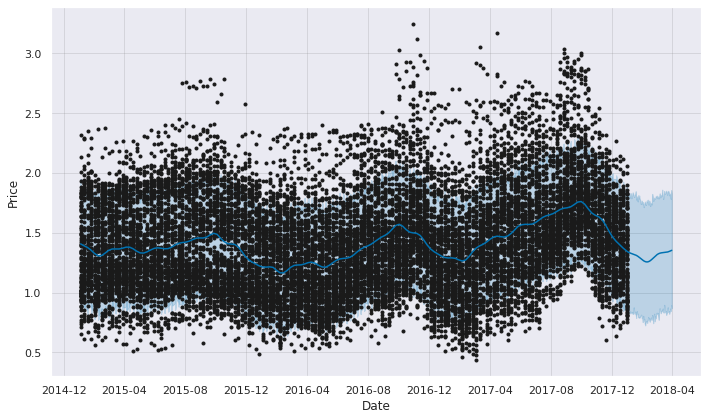

In [282]:
# Check prediction
figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Price')

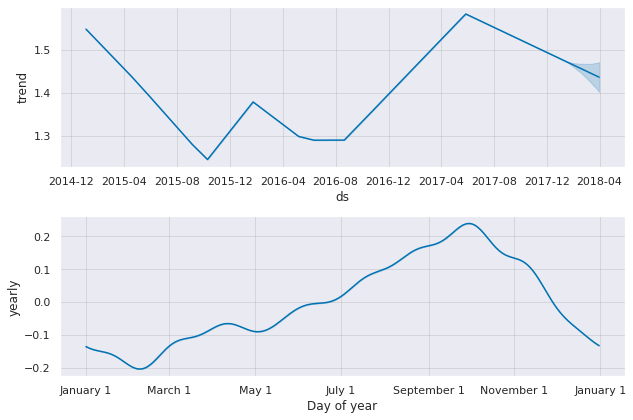

In [283]:
# Check trend
figure2 = model.plot_components(forecast)

The overall trend shows decrement in price during the start of 2018. The yearly trend shows the price spike during the month of October. 

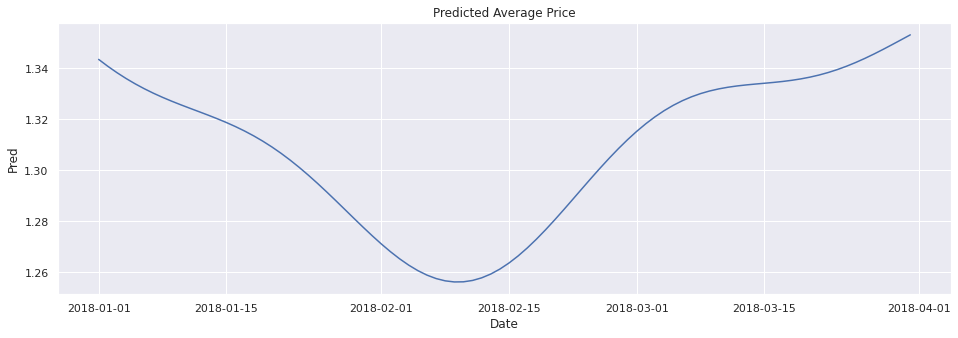

In [290]:
prophet_pred = pd.DataFrame({"Date" : forecast[-90:]['ds'], "Pred" : forecast[-90:]["yhat"]})

# import seaborn as sns
plt.figure(figsize=(16,5))
plt.title('Predicted Average Price')
ax = sns.lineplot('Date', 'Pred', data = prophet_pred)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


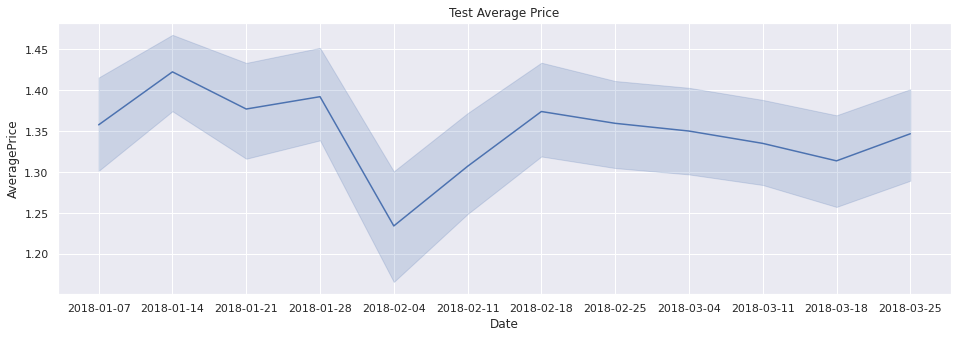

In [297]:
plt.figure(figsize=(16,5))
plt.title('Test Average Price')
sns.lineplot('Date', 'AveragePrice', data=df_test)

The predicted price roughly follows a similar pattern with the real average price of Avocado.